## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
from keras.layers import Dropout

def build_mlp(input_shape, output_unit=10, num=[512,256,128], drop_rate=0.1):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, num in enumerate(num):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = Dropout(drop_rate)(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1))(x)
            x = Dropout(drop_rate)(x)
            
    output_layer = keras.layers.Dense(units=output_unit, activation='softmax', name='output_layer')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
Dropout_EXP = [0.0, 0.1, 0.2, 0.3]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for ratio in Dropout_EXP:
    keras.backend.clear_session()
    print("Experiment with Dropout = %.6f" % (ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drop_rate=ratio)
    model.summary()
    
    optimizer = keras.optimizers.sgd(lr = LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-dropout-%s" % str(ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256) 

50000/50000 [==============================] - 6s 121us/step - loss: 0.5275 - acc: 0.8533 - val_loss: 1.5366 - val_acc: 0.5112
Epoch 47/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.5105 - acc: 0.8611 - val_loss: 1.5459 - val_acc: 0.5084
Epoch 48/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.4922 - acc: 0.8673 - val_loss: 1.5570 - val_acc: 0.5090
Epoch 49/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.4757 - acc: 0.8752 - val_loss: 1.5731 - val_acc: 0.5093
Epoch 50/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.4597 - acc: 0.8816 - val_loss: 1.5817 - val_acc: 0.5113
Experiment with Dropout = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 6s 113us/step - loss: 1.1422 - acc: 0.5920 - val_loss: 1.3101 - val_acc: 0.5324
Epoch 42/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.1351 - acc: 0.5954 - val_loss: 1.3064 - val_acc: 0.5333
Epoch 43/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.1265 - acc: 0.5999 - val_loss: 1.3040 - val_acc: 0.5357
Epoch 44/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.1170 - acc: 0.6025 - val_loss: 1.3049 - val_acc: 0.5364
Epoch 45/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.1091 - acc: 0.6059 - val_loss: 1.3020 - val_acc: 0.5352
Epoch 46/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.0999 - acc: 0.6083 - val_loss: 1.2991 - val_acc: 0.5381
Epoch 47/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.0922 - acc: 0.6109 - val_loss: 1.3001 - val_acc: 0.5395
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 5s 110us/step - loss: 1.3886 - acc: 0.5013 - val_loss: 1.3538 - val_acc: 0.5177
Epoch 37/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3826 - acc: 0.5018 - val_loss: 1.3505 - val_acc: 0.5192
Epoch 38/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.3778 - acc: 0.5052 - val_loss: 1.3458 - val_acc: 0.5196
Epoch 39/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.3700 - acc: 0.5097 - val_loss: 1.3436 - val_acc: 0.5214
Epoch 40/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.3659 - acc: 0.5110 - val_loss: 1.3398 - val_acc: 0.5237
Epoch 41/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.3607 - acc: 0.5120 - val_loss: 1.3366 - val_acc: 0.5236
Epoch 42/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.3554 - acc: 0.5130 - val_loss: 1.3340 - val_acc: 0.5253
Epoch 43/50
50000/50000 [==============

50000/50000 [==============================] - 6s 111us/step - loss: 1.5548 - acc: 0.4435 - val_loss: 1.4407 - val_acc: 0.4817
Epoch 32/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5521 - acc: 0.4431 - val_loss: 1.4345 - val_acc: 0.4840
Epoch 33/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5477 - acc: 0.4465 - val_loss: 1.4311 - val_acc: 0.4854
Epoch 34/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.5371 - acc: 0.4484 - val_loss: 1.4269 - val_acc: 0.4838
Epoch 35/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5296 - acc: 0.4515 - val_loss: 1.4238 - val_acc: 0.4874
Epoch 36/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5262 - acc: 0.4517 - val_loss: 1.4208 - val_acc: 0.4884
Epoch 37/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5197 - acc: 0.4594 - val_loss: 1.4165 - val_acc: 0.4907
Epoch 38/50
50000/50000 [==============

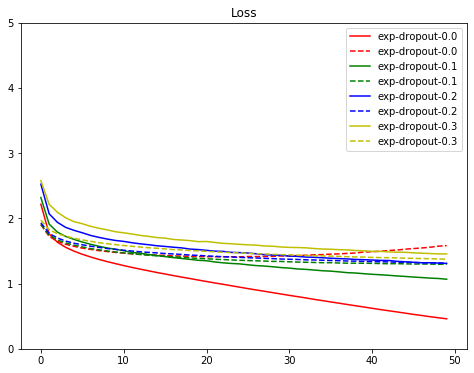

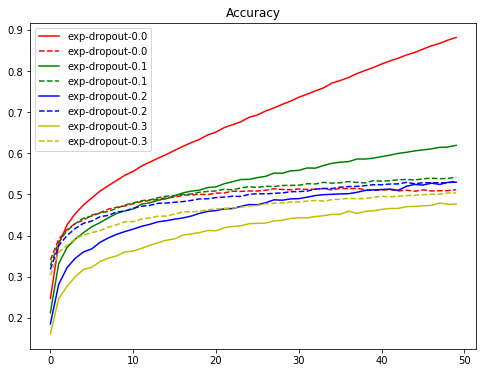

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
from keras.regularizers import l1

def build_mlp(input_shape, output_unit=10, num=[512,256,128], drop_rate=0.1, l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, num in enumerate(num):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1), kernel_regularizer=l1(l1_ratio))(x)
            x = Dropout(drop_rate)(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1), kernel_regularizer=l1(l1_ratio))(x)
            x = Dropout(drop_rate)(x)
            
    output_layer = keras.layers.Dense(units=output_unit, activation='softmax', name='output_layer')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [10]:
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for ratio in L1_EXP:
    keras.backend.clear_session()
    print("Experiment with L1 Regulizer = %.6f" % (ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=ratio)
    model.summary()
    
    optimizer = keras.optimizers.sgd(lr = LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L1 Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 

50000/50000 [==============================] - 6s 123us/step - loss: 2.2865 - acc: 0.3364 - val_loss: 2.2332 - val_acc: 0.3699
Epoch 47/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.2862 - acc: 0.3371 - val_loss: 2.2503 - val_acc: 0.3615
Epoch 48/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2831 - acc: 0.3391 - val_loss: 2.2425 - val_acc: 0.3665
Epoch 49/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3154 - acc: 0.3345 - val_loss: 2.2811 - val_acc: 0.3586
Epoch 50/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.2866 - acc: 0.3377 - val_loss: 2.2826 - val_acc: 0.3458
Experiment with L1 Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normali

50000/50000 [==============================] - 6s 115us/step - loss: 4.4770 - acc: 0.5996 - val_loss: 4.6412 - val_acc: 0.5369
Epoch 42/50
50000/50000 [==============================] - 6s 124us/step - loss: 4.4518 - acc: 0.6030 - val_loss: 4.6297 - val_acc: 0.5380
Epoch 43/50
50000/50000 [==============================] - 6s 118us/step - loss: 4.4272 - acc: 0.6055 - val_loss: 4.6123 - val_acc: 0.5378
Epoch 44/50
50000/50000 [==============================] - 6s 118us/step - loss: 4.4007 - acc: 0.6123 - val_loss: 4.5921 - val_acc: 0.5408
Epoch 45/50
50000/50000 [==============================] - 7s 131us/step - loss: 4.3760 - acc: 0.6133 - val_loss: 4.5763 - val_acc: 0.5398
Epoch 46/50
50000/50000 [==============================] - 6s 122us/step - loss: 4.3527 - acc: 0.6140 - val_loss: 4.5590 - val_acc: 0.5415
Epoch 47/50
50000/50000 [==============================] - 6s 122us/step - loss: 4.3275 - acc: 0.6193 - val_loss: 4.5456 - val_acc: 0.5371
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 6s 127us/step - loss: 1.1892 - acc: 0.5767 - val_loss: 1.3271 - val_acc: 0.5234
Epoch 37/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.1825 - acc: 0.5796 - val_loss: 1.3238 - val_acc: 0.5266
Epoch 38/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.1679 - acc: 0.5836 - val_loss: 1.3252 - val_acc: 0.5247
Epoch 39/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.1618 - acc: 0.5845 - val_loss: 1.3208 - val_acc: 0.5253
Epoch 40/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.1524 - acc: 0.5898 - val_loss: 1.3191 - val_acc: 0.5282
Epoch 41/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.1456 - acc: 0.5940 - val_loss: 1.3163 - val_acc: 0.5304
Epoch 42/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.1351 - acc: 0.5951 - val_loss: 1.3159 - val_acc: 0.5312
Epoch 43/50
50000/50000 [==============

50000/50000 [==============================] - 6s 128us/step - loss: 1.2471 - acc: 0.5565 - val_loss: 1.3452 - val_acc: 0.5224
Epoch 32/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.2373 - acc: 0.5595 - val_loss: 1.3410 - val_acc: 0.5225
Epoch 33/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.2251 - acc: 0.5644 - val_loss: 1.3373 - val_acc: 0.5240
Epoch 34/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.2175 - acc: 0.5664 - val_loss: 1.3336 - val_acc: 0.5260
Epoch 35/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.2100 - acc: 0.5705 - val_loss: 1.3313 - val_acc: 0.5286
Epoch 36/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.1990 - acc: 0.5725 - val_loss: 1.3301 - val_acc: 0.5267
Epoch 37/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.1875 - acc: 0.5766 - val_loss: 1.3246 - val_acc: 0.5303
Epoch 38/50
50000/50000 [==============

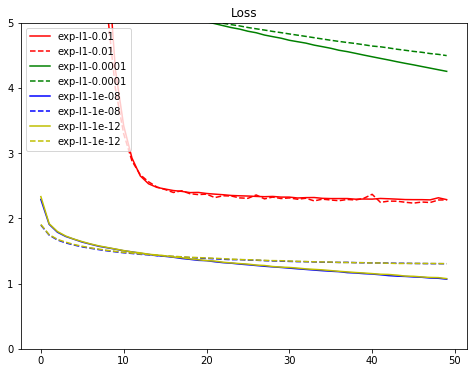

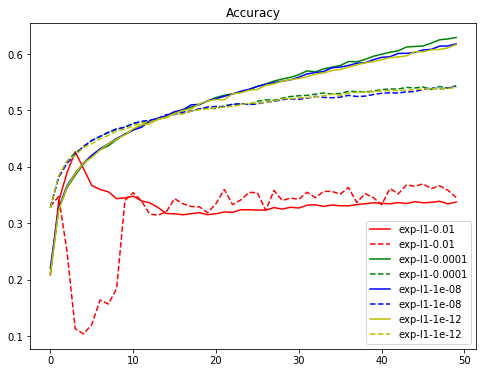

In [12]:
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [13]:
from keras.regularizers import l2

def build_mlp(input_shape, output_unit=10, num=[512,256,128], drop_rate=0.1, l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, num in enumerate(num):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1), kernel_regularizer=l2(l2_ratio))(x)
            x = Dropout(drop_rate)(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=num, activation='relu', name='hidden_layer'+str(i+1), kernel_regularizer=l2(l2_ratio))(x)
            x = Dropout(drop_rate)(x)
            
    output_layer = keras.layers.Dense(units=output_unit, activation='softmax', name='output_layer')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [14]:
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for ratio in L2_EXP:
    keras.backend.clear_session()
    print("Experiment with L2 Regulizer = %.6f" % (ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=ratio)
    model.summary()
    
    optimizer = keras.optimizers.sgd(lr = LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L2 Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 

50000/50000 [==============================] - 7s 131us/step - loss: 3.2919 - acc: 0.6960 - val_loss: 3.6337 - val_acc: 0.5488
Epoch 47/50
50000/50000 [==============================] - 7s 130us/step - loss: 3.1887 - acc: 0.7039 - val_loss: 3.5458 - val_acc: 0.5502
Epoch 48/50
50000/50000 [==============================] - 7s 131us/step - loss: 3.0887 - acc: 0.7098 - val_loss: 3.4720 - val_acc: 0.5509
Epoch 49/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.9929 - acc: 0.7133 - val_loss: 3.3914 - val_acc: 0.5548
Epoch 50/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.8971 - acc: 0.7193 - val_loss: 3.3148 - val_acc: 0.5507
Experiment with L2 Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normali

50000/50000 [==============================] - 6s 124us/step - loss: 1.2789 - acc: 0.5950 - val_loss: 1.4330 - val_acc: 0.5378
Epoch 42/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.2695 - acc: 0.5983 - val_loss: 1.4336 - val_acc: 0.5408
Epoch 43/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.2642 - acc: 0.5977 - val_loss: 1.4281 - val_acc: 0.5384
Epoch 44/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.2558 - acc: 0.6036 - val_loss: 1.4291 - val_acc: 0.5377
Epoch 45/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.2475 - acc: 0.6054 - val_loss: 1.4260 - val_acc: 0.5397
Epoch 46/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.2370 - acc: 0.6082 - val_loss: 1.4254 - val_acc: 0.5395
Epoch 47/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.2261 - acc: 0.6153 - val_loss: 1.4252 - val_acc: 0.5389
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 6s 112us/step - loss: 1.1912 - acc: 0.5774 - val_loss: 1.3213 - val_acc: 0.5280
Epoch 37/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.1824 - acc: 0.5785 - val_loss: 1.3181 - val_acc: 0.5319
Epoch 38/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.1740 - acc: 0.5842 - val_loss: 1.3152 - val_acc: 0.5325
Epoch 39/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.1643 - acc: 0.5861 - val_loss: 1.3137 - val_acc: 0.5327
Epoch 40/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.1520 - acc: 0.5937 - val_loss: 1.3104 - val_acc: 0.5332
Epoch 41/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.1435 - acc: 0.5932 - val_loss: 1.3098 - val_acc: 0.5291
Epoch 42/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.1392 - acc: 0.5953 - val_loss: 1.3069 - val_acc: 0.5338
Epoch 43/50
50000/50000 [==============

50000/50000 [==============================] - 6s 117us/step - loss: 1.2483 - acc: 0.5555 - val_loss: 1.3436 - val_acc: 0.5201
Epoch 32/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.2356 - acc: 0.5597 - val_loss: 1.3399 - val_acc: 0.5195
Epoch 33/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.2255 - acc: 0.5648 - val_loss: 1.3362 - val_acc: 0.5214
Epoch 34/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.2190 - acc: 0.5702 - val_loss: 1.3345 - val_acc: 0.5220
Epoch 35/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.2049 - acc: 0.5708 - val_loss: 1.3310 - val_acc: 0.5254
Epoch 36/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.2012 - acc: 0.5734 - val_loss: 1.3283 - val_acc: 0.5240
Epoch 37/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.1889 - acc: 0.5776 - val_loss: 1.3255 - val_acc: 0.5257
Epoch 38/50
50000/50000 [==============

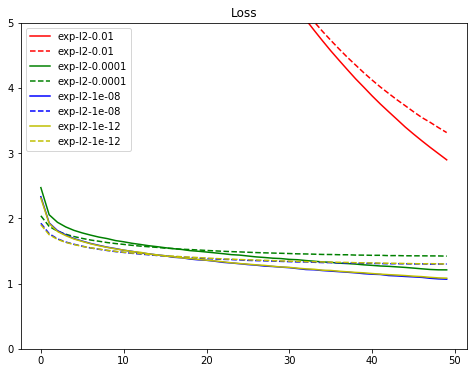

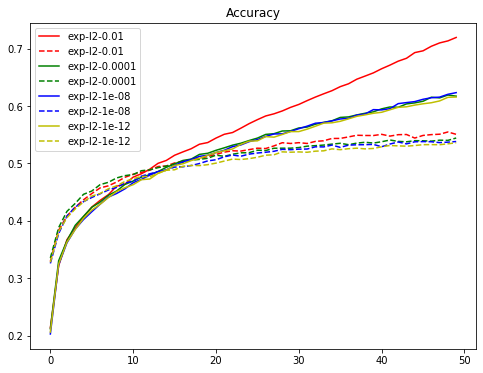

In [19]:
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Result
- Dropout 在0.1時會有最佳的效果
- 再加上Regularization(L1, L2)還能些許提升正確度